<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

Load the dataset into a dataframe.


In [26]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [27]:
df['CompFreq'].dropna(inplace=True)
df['CompTotal'].dropna(inplace=True)
df['ConvertedComp'].dropna(inplace=True)

df['CompFreq'].fillna('Yearly', inplace=True)
df['CompTotal'].fillna(0, inplace=True)
df['ConvertedComp'].fillna(0, inplace=True)

def fillcomp(freq,total):

    if freq=='Yearly':
        return total

    elif freq=='Monthly':
        return total * 12

    elif freq=='Weekly':
        return total * 50

df['ConvertedComp']=df.apply(lambda row:fillcomp(row['CompFreq'], row['ConvertedComp']),axis=1)
df['ConvertedComp'].info()
df['ConvertedComp'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 11398 entries, 0 to 11397
Series name: ConvertedComp
Non-Null Count  Dtype  
--------------  -----  
11398 non-null  float64
dtypes: float64(1)
memory usage: 89.2 KB


count    1.139800e+04
mean     2.020013e+06
std      1.121478e+07
min      0.000000e+00
25%      5.479700e+04
50%      1.011600e+05
75%      2.774880e+05
max      1.000000e+08
Name: ConvertedComp, dtype: float64

In [40]:
df['ConvertedComp'].describe().loc[['min','25%','mean','75%','max']]

min     0.000000e+00
25%     5.479700e+04
mean    2.020013e+06
75%     2.774880e+05
max     1.000000e+08
Name: ConvertedComp, dtype: float64

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\Corona\AppData\Local\Temp\ipykernel_206924\3404401351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], kde=True)
C:\Users\Corona\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


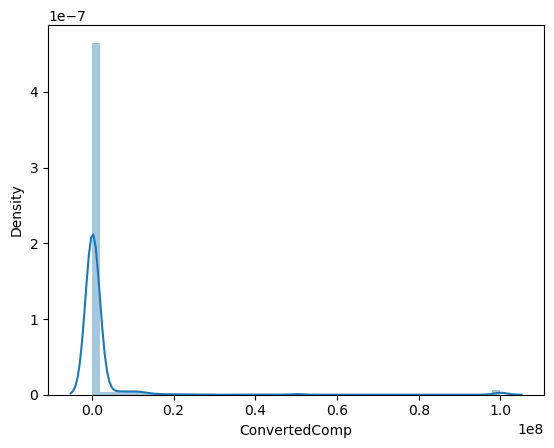

In [28]:
# your code goes here
sns.distplot(df['ConvertedComp'], kde=True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


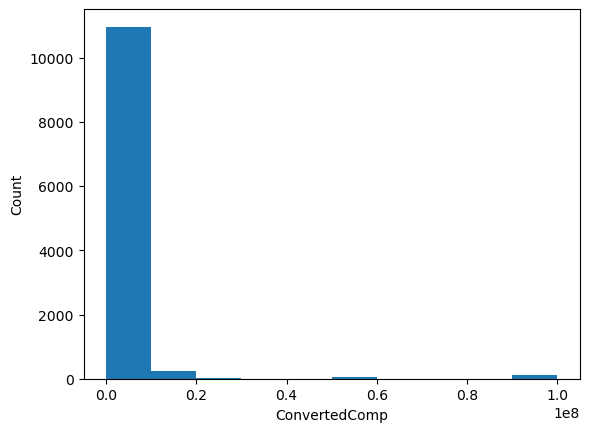

In [29]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')
plt.title=('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Count')
plt.show()

What is the median of the column `ConvertedComp`?


In [30]:
# your code goes here
df['ConvertedComp'].median()

101160.0

How many responders identified themselves only as a **Man**?


In [11]:
# your code goes here
df['Gender'].value_counts()                               

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [31]:
# your code goes here
women_df = df[df['Gender'] == 'Woman']
median_converted_comp = women_df['ConvertedComp'].median()

print(f"Median ConvertedComp for responders identified as women: {median_converted_comp}")

Median ConvertedComp for responders identified as women: 91000.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [32]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: >

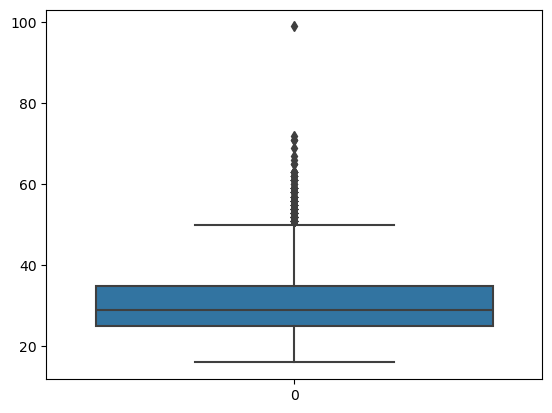

In [54]:
# your code goes here
sns.boxplot(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


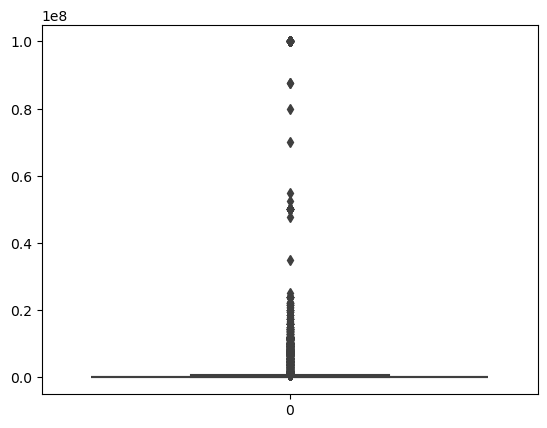

In [34]:
# your code goes here
sns.boxplot(df['ConvertedComp'])
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`

In [35]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print(f'The IQR is: {IQR}')

The IQR is: 222691.0


Find out the upper and lower bounds.


In [36]:
# your code goes here
q75, q25 = np.percentile(df['ConvertedComp'], [75 ,25])
print(f'The lower bounds is: {q25}')
print(f'The upper bound is:{q75}')

The lower bounds is: 54797.0
The upper bound is:277488.0


Identify how many outliers are there in the `ConvertedComp` column.

In [37]:
#create a function to find outliers using IQR
print(((df['ConvertedComp'] < (Q1-1.5*IQR)) | (df['ConvertedComp']> (Q3+1.5*IQR))).sum())  

1525


In [38]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['ConvertedComp'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers

number of outliers: 1525
max outlier value: 100000000.0
min outlier value: 612432.0


3         5464224.0
12        5000000.0
13       55000000.0
14         615744.0
17        1055952.0
            ...    
11369     8414352.0
11373      715824.0
11374      659952.0
11381      874656.0
11391      824976.0
Name: ConvertedComp, Length: 1525, dtype: float64

In [39]:
outliers = find_outliers_IQR(df[['ConvertedComp']])
outliers

,ConvertedComp
0,NaN
1,NaN
2,NaN
3,5464224.0
4,NaN
...,...
11393,NaN
11394,NaN
11395,NaN
11396,NaN


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [47]:
df2=df[(df['ConvertedComp'] > (Q1 - 1.5 * IQR)) & (df['ConvertedComp'] < (Q3 + 1.5 * IQR))] 

In [48]:
#difference after outliers removed
df2.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9873.000000,9.873000e+03,9873.000000,9757.000000,7773.000000,9614.000000
mean,12451.397853,7.042863e+05,131309.049326,41.766429,4.815762,30.574194
std,7219.548889,7.118564e+06,133840.825820,21.485421,4.634433,7.377830
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6256.000000,1.020000e+04,48000.000000,40.000000,2.000000,25.000000
50%,12441.000000,6.100000e+04,85968.000000,40.000000,4.000000,29.000000
75%,18723.000000,1.180000e+05,157392.000000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,610416.000000,475.000000,99.000000,99.000000


In [53]:
df2['ConvertedComp'].describe().loc[['min','25%','mean','75%','max']]

min          0.000000
25%      48000.000000
mean    131309.049326
75%     157392.000000
max     610416.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [51]:
#Adding in the other numerical columns to correlate with
#df2[['Age','WorkWeekHrs']] = df[['Age','WorkWeekHrs']].copy()
#check it
df2

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat l

In [52]:
# your code goes here
for param in ['WorkWeekHrs','ConvertedComp']:
    print(f"The correlation of Age and {param} is:", df2[[param,"Age"]].corr())

The correlation of Age and WorkWeekHrs is:              WorkWeekHrs       Age
WorkWeekHrs     1.000000  0.039796
Age             0.039796  1.000000
The correlation of Age and ConvertedComp is:                ConvertedComp       Age
ConvertedComp       1.000000  0.040735
Age                 0.040735  1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
